<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=black>Vấn đề và Thách thức:</font></h3>

Xây dựng một mô hình dự đoán để xác định liệu một đơn đặt phòng khách sạn có bị hủy hay không — điều này rất quan trọng đối với các khách sạn vì việc hủy đặt phòng ảnh hưởng đến doanh thu và kế hoạch vận hành.

Thách thức nằm ở các bước tiền xử lý dữ liệu cho bộ dữ liệu phức tạp, bao gồm chọn lựa và tạo đặc trưng, xử lý giá trị thiếu và nhiễu trong dữ liệu.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=black>Tổng quan dự án:</font></h3>

* __Khám phá bộ dữ liệu__: Tìm hiểu thông tin cơ bản về bộ dữ liệu, thống kê mô tả cho các biến số kiểu số và kiểu phân loại.
* __Các bước tiền xử lý__:
  - Lựa chọn và tạo đặc trưng
  - Xử lý giá trị thiếu
  - Xử lý dữ liệu nhiễu
  - Mã hóa các biến phân loại
* __Xây dựng mô hình__: Triển khai và tinh chỉnh các mô hình phân loại bao gồm Decision Trees, Random Forest và XGBoost.
* __Đánh giá và so sánh hiệu suất mô hình__: Sử dụng các chỉ số như accuracy, precision, recall, F1-score và AUC để đánh giá mức độ hiệu quả của các mô hình.
* __Phân tích tầm quan trọng của các đặc trưng__: Hiểu rõ những đặc trưng nào có ảnh hưởng lớn nhất đến kết quả dự đoán.

<a id="contents_tabel"></a>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h3 align="left"><font color=black>Mục lục:</font></h3>
        
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#numerical)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#categorical)
* [Step 4 | Data Preprocessing](#preprocessing)
    - [Step4.1 | Feature Selection and Engineering](#engineering)
        - [Step 4.1.1 | Remove Directly Related Features](#direct)
        - [Step 4.1.2 | Drop Irrelevant Features](#irrelevant)
        - [Step 4.1.3 | Engineer and Drop High-Cardinality Features](#cardinality)
    - [Step 4.2 | Handle Missing Values](#missing)
    - [Step 4.3 | Handle Noisy Data](#missing)
    - [Step 4.4 | Encode Categorical Variables](#encode)
    - [Step 4.5 | Check Imbalanced Data](#imbalance)
    - [Step 4.6 | Split the Dataset](#split)
* [Step 5 | Decision Tree Model Building](#dt)
    - [Step 5.1 | DT Base Model Definition](#dt_base)
    - [Step 5.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 5.3 | DT Model Evaluation](#dt_evaluation)
* [Step 6 | Random Forest Model Building](#rf)
    - [Step 6.1 | RF Base Model Definition](#rf_base)
    - [Step 6.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 6.3 | RF Model Evaluation](#rf_evaluation)
* [Step 7 | XGBoost Model Building](#xgb)
    - [Step 7.1 | XGBoost Base Model Definition](#xgb_base)
    - [Step 7.2 | XGBoost Hyperparameter Tuning](#xgb_hp)
    - [Step 7.3 | XGBoost Model Evaluation](#xgb_evaluation)
    - [Step 7.4 | XGBoost Feature Importance](#xgb_imp)
* [Step 8 | TabNet Model Building](#tabnet)
* [Step 9 | FT-Transformer Building](#ft-transformer)
* [Step 10 | LightGBM Building](#lgbm)
* [Step 11 | Logistic Regression Building](#logistic)
* [Step 12 | CatBoost Building](#catboost)


<a id="import"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [2]:
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hotel_booking.csv to hotel_booking.csv


In [4]:
# Read dataset
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:120%; text-align:left">

<h2 align="left"><font color=black>Mô tả các thuộc tính:</font></h2>

| __Index__ | __Variable__ | __Description__ |
|   :---    |     :---     |       :---      |
| 1 | __hotel__ | Type of hotel (Resort Hotel, City Hotel) |
| 2 | __is_canceled__ | Reservation cancellation status (0 = not canceled, 1 = canceled) |
| 3 | __lead_time__ | Number of days between booking and arrival |
| 4 | __arrival_date_year__ | Year of arrival |
| 5 | __arrival_date_month__ | Month of arrival |
| 6 | __arrival_date_week_number__ | Week number of the year for arrival |
| 7 | __arrival_date_day_of_month__ | Day of the month of arrival |
| 8 | __stays_in_weekend_nights__ | Number of weekend nights (Saturday and Sunday) the guest stayed or booked |
| 9 | __stays_in_week_nights__ | Number of week nights the guest stayed or booked |
| 10 | __adults__ | Number of adults |
| 11 | __children__ | Number of children |
| 12 | __babies__ | Number of babies |
| 13 | __meal__ | Type of meal booked (BB, FB, HB, SC, Undefined) |
| 14 | __country__ | Country of origin of the guest |
| 15 | __market_segment__ | Market segment designation |
| 16 | __distribution_channel__ | Booking distribution channel |
| 17 | __is_repeated_guest__ | If the guest is a repeat customer (0 = not repeated, 1 = repeated) |
| 18 | __previous_cancellations__ | Number of previous bookings that were canceled by the customer |
| 19 | __previous_bookings_not_canceled__ | Number of previous bookings that were not canceled by the customer |
| 20 | __reserved_room_type__ | Type of reserved room |
| 21 | __assigned_room_type__ | Type of assigned room |
| 22 | __booking_changes__ | Number of changes made to the booking |
| 23 | __deposit_type__ | Type of deposit made (No Deposit, Refundable, Non Refund) |
| 24 | __agent__ | ID of the travel agent responsible for the booking |
| 25 | __company__ | ID of the company responsible for the booking |
| 26 | __days_in_waiting_list__ | Number of days the booking was in the waiting list |
| 27 | __customer_type__ | Type of customer (Transient, Contract, Transient-Party, Group) |
| 28 | __adr__ | Average Daily Rate |
| 29 | __required_car_parking_spaces__ | Number of car parking spaces required |
| 30 | __total_of_special_requests__ | Number of special requests made |
| 31 | __reservation_status__ | Last reservation status (Check-Out, Canceled, No-Show) |
| 32 | __reservation_status_date__ | Date of the last reservation status |
| 33 | __name__ | Guest's name |
| 34 | __email__ | Guest's email address |
| 35 | __phone-number__ | Guest's phone number |
| 36 | __credit_card__ | Last four digits of the guest's credit card |


<a id="overview"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="basic"></a>
# <b><span style='color:blue'>Step 3.1 |</span><span style='color:black'> Dataset Basic Information</span></b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.shape, df.size

((119390, 36), 4298040)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=black>Kết luận:</font></h2>

* __Số lượng bản ghi__: Bộ dữ liệu bao gồm __119.390__ bản ghi.

* __Các cột__: Bộ dữ liệu có 36 cột, đại diện cho nhiều thuộc tính khác nhau liên quan đến việc đặt phòng khách sạn.

* __Kiểu dữ liệu__:
    - Phần lớn các cột (cụ thể là 16 cột) có kiểu dữ liệu object (thường biểu thị chuỗi hoặc dữ liệu phân loại).
    - 16 cột có kiểu dữ liệu int64, biểu diễn các giá trị số nguyên.
    - 4 cột có kiểu dữ liệu float64, thường biểu diễn các giá trị thập phân.
* __Giá trị thiếu__:
    - Cột `children` có 4 giá trị bị thiếu.
    - Cột `country` có 488 giá trị bị thiếu.
    - Cột `agent` có 16.340 giá trị bị thiếu.
    - Cột `company` có số lượng giá trị thiếu rất lớn, lên đến 112.593.

Những giá trị thiếu này có thể cần được xử lý tùy theo bối cảnh phân tích hoặc yêu cầu của mô hình dự định xây dựng.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=black>Note:</font></h2>

Dựa trên kiểu dữ liệu và phần giải thích đặc trưng ở trên, có __20 cột__ (`hotel`, `is_canceled`, `arrival_date_year`, `arrival_date_month`, `meal`, `country`, `market_segment`, `distribution_channel`, `is_repeated_guest`, `reserved_room_type`, `assigned_room_type`, `deposit_type`, `agent`, `company`, `customer_type`, `reservation_status`, `name`, `email`, `phone-number` và `credit_card`) mang ý nghĩa __phân loại__ theo ngữ nghĩa. Những đặc trưng này cần phải có kiểu dữ liệu chuỗi (__object__) để đảm bảo việc phân tích và diễn giải trong các bước tiếp theo được chính xác:

In [7]:
# Dựa trên mô tả tập dữ liệu, danh sách các cột có tính chất phân loại theo ngữ nghĩa
categorical_columns_semantics = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# Chuyển đổi các cột này thành kiểu dữ liệu chuỗi (đối tượng)
for column in categorical_columns_semantics:
    if column in df.columns:
        df[column] = df[column].astype(str)

# Verify những thay đổi trong kiểu dữ liệu
df.dtypes

,0
hotel,object
is_canceled,object
lead_time,int64
arrival_date_year,object
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


<a id="numerical"></a>
# <b><span style='color:blue'>Step 3.2 |</span><span style='color:black'> Summary Statistics for Numerical Variables</span></b>

In [8]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=black>Numerical Variables:</font></h2>

* __`lead_time`__: Thời gian trung bình từ lúc đặt phòng đến khi đến khách sạn là khoảng 104 ngày, dao động từ 0 đến 737 ngày.
    

* __`arrival_date_week_number`__: Tuần trong năm mà khách đến có giá trị trung bình là 27.17, nằm trong khoảng từ tuần 1 đến tuần 53.

    
* __`arrival_date_day_of_month`__: Ngày trong tháng mà khách đến có giá trị trung bình là 15.80, dao động từ ngày 1 đến ngày 31.
    
    
* __`stays_in_weekend_nights`__: Trung bình, khách lưu trú khoảng 0.93 đêm cuối tuần, một số khách ở tối đa 19 đêm cuối tuần.
    
    
* __`stays_in_week_nights`__: Trung bình, khách lưu trú khoảng 2.5 đêm trong tuần, với số đêm lưu trú dao động từ 0 đến 50 đêm.
    
    
* __`adults`__: Số người lớn trung bình trong mỗi lượt đặt phòng là khoảng 1.86, dao động từ 0 đến 55 người lớn.
    
    
* __`children`__: Trung bình có khoảng 0.1 trẻ em trong mỗi lượt đặt phòng, với tối đa 10 trẻ em trong một số lượt đặt.
    
    
* __`babies`__: Số lượng trẻ sơ sinh trung bình là 0.008, rất thấp, với tối đa 10 trẻ sơ sinh trong một số lượt đặt phòng.
    
    
* __`previous_cancellations`__: Trung bình, khách đã hủy 0.09 lượt đặt phòng trước đó, một số khách từng hủy tối đa 26 lần.
    
    
* __`previous_bookings_not_canceled`__: Trung bình, khách từng có 0.14 lượt đặt phòng không bị hủy, với tối đa 72 lượt đặt không bị hủy trước đó.
    
    
* __`booking_changes`__: Trung bình mỗi lượt đặt phòng được thay đổi khoảng 0.22 lần, một số lượt được thay đổi lên đến 21 lần.

    
* __`days_in_waiting_list`__: Thời gian trung bình một lượt đặt phòng nằm trong danh sách chờ là 2.32 ngày, tối đa có thể lên đến 391 ngày.
    
    
* __`adr`__: Giá phòng trung bình mỗi ngày là khoảng 101.83, dao động từ -6.38 (có thể là lỗi hoặc trường hợp đặc biệt) đến 5400.
    
    
* __`required_car_parking_spaces`__: Trung bình, khách yêu cầu khoảng 0.06 chỗ đậu xe, một số lượt đặt yêu cầu tối đa 8 chỗ.
    
* __`total_of_special_requests`__: Trung bình, mỗi lượt đặt có khoảng 0.57 yêu cầu đặc biệt, tối đa là 5 yêu cầu.


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h2 align="left"><font color=black>Noisy Data Features:</font></h2>

1. __`adr`__: Chỉ số "Average Daily Rate" (Giá trung bình mỗi ngày) đại diện cho số tiền trung bình mà khách phải trả cho một phòng mỗi ngày. Trong bộ dữ liệu này, giá trị nhỏ nhất của ADR là -6.38. Một mức giá âm là điều vô lý, cho thấy có thể có lỗi dữ liệu hoặc các trường hợp đặc biệt.

    
2. __`adults`__: Giá trị nhỏ nhất là 0, ngụ ý rằng có các lượt đặt phòng không có người lớn nào. Điều này có thể là lỗi nhập liệu, trừ khi có các trường hợp hợp lệ mà chỉ có trẻ em hoặc em bé đặt phòng.

    
3. __`children`__ and __`babies`__: Cả hai trường đều có giá trị tối đa là 10, con số này có vẻ bất thường đối với một lượt đặt phòng đơn lẻ. Đây có thể là ngoại lệ (outlier) hoặc lỗi nhập liệu, nhưng cần thêm bối cảnh hoặc kiến thức chuyên môn để kết luận chính xác.


<a id="categorical"></a>
# <b><span style='color:blue'>Step 3.3 |</span><span style='color:black'> Summary Statistics for Categorical Variables</span></b>

In [9]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    
    
<h2 align="left"><font color=black>Categorical Variables:</font></h2>

* __`hotel`__: Có hai loại khách sạn, trong đó "City Hotel" là loại phổ biến nhất, xuất hiện 79.330 lần trong tổng số 119.390 bản ghi.

    
* __`is_canceled`__: Có hai giá trị duy nhất (0 là không hủy, 1 là đã hủy). Giá trị phổ biến nhất là "0" (không hủy), xuất hiện 75.166 lần.

    
* __`arrival_date_year`__: Có ba năm duy nhất được ghi nhận, trong đó năm 2016 là phổ biến nhất với 56.707 lượt đến.

    
* __`arrival_date_month`__: Có 12 tháng duy nhất. Tháng 8 là tháng có lượt đến nhiều nhất, với 13.877 lượt.

    
* __`meal`__: Có năm loại bữa ăn được đặt. Loại phổ biến nhất là "BB" (chỉ bao gồm bữa sáng), xuất hiện 92.310 lần.

    
* __`country`__: Có 178 quốc gia xuất xứ khác nhau. Quốc gia phổ biến nhất là "PRT" (Bồ Đào Nha), xuất hiện 48.590 lần.

    
* __`market_segment`__: Có tám phân khúc thị trường khác nhau. Phân khúc phổ biến nhất là "Online TA" (đại lý du lịch trực tuyến), xuất hiện 56.477 lần.


    
* __`distribution_channel`__: Có năm kênh phân phối khác nhau, trong đó "TA/TO" (Đại lý du lịch/Đơn vị tổ chức tour) là phổ biến nhất, xuất hiện 97.870 lần.

    
* __`is_repeated_guest`__: Có hai giá trị duy nhất (0 là không quay lại, 1 là có quay lại). Giá trị phổ biến nhất là "0", xuất hiện trong phần lớn các bản ghi.

    
* __`reserved_room_type`__ and __`assigned_room_type`__: Có nhiều loại phòng khác nhau, một số loại phổ biến hơn các loại khác.

    
* __`deposit_type`__: Có ba loại tiền đặt cọc khác nhau. Loại phổ biến nhất là "No Deposit" (không đặt cọc), xuất hiện 104.641 lần.


* __`agent`__: Có 334 đại lý khác nhau, với đại lý '9.0' là phổ biến nhất, xuất hiện 31.961 lần.
    
    
* __`company`__: Có 353 công ty khác nhau, nhưng giá trị '__nan__' (thiếu dữ liệu) là phổ biến nhất, xuất hiện 112.593 lần. Điều này cho thấy biến 'company' có tỷ lệ thiếu dữ liệu cao.
    
    
* __`customer_type`__: Có bốn loại khách hàng khác nhau. Loại phổ biến nhất là "Transient" (khách vãng lai), xuất hiện 89.613 lần.
    
* __`reservation_status`__: Có ba trạng thái đặt phòng khác nhau. Trạng thái phổ biến nhất là "Check-Out" (đã trả phòng), xuất hiện 75.166 lần.


* __`reservation_status_date`__: Có 926 giá trị khác nhau, với ngày '2015-10-21' là phổ biến nhất, xuất hiện 1.461 lần.


* __`name`__: Có 81.503 tên khác nhau, với 'Michael Johnson' là tên phổ biến nhất, xuất hiện 48 lần.
    

* __`email`__: Có 115.889 địa chỉ email khác nhau, với 'Michael.C@gmail.com' là phổ biến nhất, xuất hiện 6 lần.
    
    
* __`phone-number`__: Có 119.390 số điện thoại khác nhau, cho thấy gần như mỗi khách đều có số điện thoại riêng biệt.
    
    
* __`credit_card`__: Có 9.000 số thẻ tín dụng khác nhau, với '************4923' là phổ biến nhất, xuất hiện 28 lần.

<a id="preprocessing"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Data Preprocessing</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Tiền xử lý dữ liệu (Data preprocessing) là một bước quan trọng trong bất kỳ dự án học máy nào. Quá trình này bao gồm việc làm sạch và chuyển đổi dữ liệu thô thành định dạng mà các thuật toán học máy có thể hiểu và xử lý được.

<a id="engineering"></a>
# <b><span style='color:blue'>Step 4.1 |</span><span style='color:black'> Feature Selection and Engineering</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Trong bước __Lựa chọn và Xây dựng Đặc trưng__, chuẩn bị tập dữ liệu cho quá trình mô hình hóa bằng cách thực hiện một số hoạt động quan trọng sau:

1. **Loại bỏ các đặc trưng liên quan trực tiếp đến biến mục tiêu:** Loại bỏ các đặc trưng có liên hệ trực tiếp với biến mục tiêu để tránh rò rỉ dữ liệu và đảm bảo đánh giá mô hình một cách công bằng.
   
    
2. **Loại bỏ các đặc trưng không liên quan:** Tiếp theo, loại bỏ các đặc trưng không mang lại thông tin hữu ích cho việc dự đoán biến mục tiêu.
   
    
3. **Xây dựng và loại bỏ các đặc trưng có độ phân biệt cao (high-cardinality):** Xây dựng một số đặc trưng có độ phân biệt cao để trích xuất thông tin liên quan, sau đó loại bỏ tất cả các đặc trưng này, bao gồm cả những đặc trưng đã được trích xuất thông tin.

Những hoạt động này giúp giảm chiều dữ liệu, ngăn ngừa rò rỉ thông tin và tạo ra các đặc trưng mới có thể cung cấp thêm thông tin hữu ích cho mô hình.


In [10]:
df = pd.read_csv('hotel_booking.csv')

<a id="direct"></a>
## <b><span style='color:blue'>Step 4.1.1 |</span><span style='color:black'> Remove Directly Related Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Các đặc trưng như `reservation_status`, `reservation_status_date` và `assigned_room_type` có liên quan trực tiếp đến biến mục tiêu `is_canceled`, và việc đưa chúng vào mô hình sẽ dẫn đến __rò rỉ dữ liệu__. Việc loại bỏ những đặc trưng này là cần thiết để xây dựng một mô hình dự đoán có khả năng thực sự dự báo việc hủy đặt phòng, thay vì chỉ đơn thuần gán nhãn theo dữ liệu đã biết trong quá khứ:

<a id="basic"></a>
## <b><span style='color:blue'>Step 4.1.1.1 |</span><span style='color:black'> reservation_status</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

`reservation_status` là một đặc trưng phân loại biểu thị trạng thái hiện tại của một lượt đặt phòng. Đặc trưng này có thể có các giá trị như '__Canceled__', '__Check-Out__', và '__No-Show__'. Đặc trưng này có liên hệ trực tiếp với biến mục tiêu `is_canceled` vì các lý do sau:

- Nếu `reservation_status` là '__Canceled__', điều đó có nghĩa là `is_canceled` phải bằng 1.

    
- Nếu `reservation_status` là '__Check-Out__', điều đó cho thấy lượt đặt phòng không bị hủy, và do đó `is_canceled` phải bằng 0.

Vì vậy, việc biết giá trị của `reservation_status` đồng nghĩa với việc biết luôn giá trị của biến mục tiêu, dẫn đến rò rỉ dữ liệu nếu sử dụng đặc trưng này trong mô hình. Do đó, việc loại bỏ đặc trưng này là cần thiết để xây dựng một mô hình có khả năng dự đoán việc hủy đặt phòng một cách thực sự. Vì lý do đó, `reservation_status` được xem là một đặc trưng không phù hợp và cần được loại bỏ.


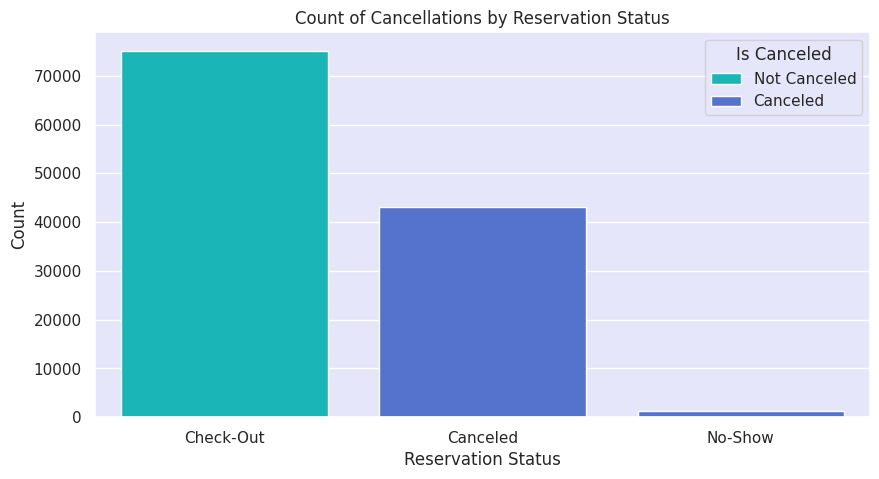

In [11]:
# Biểu đồ cột hai biến giữa 'is_canceled' và 'reservation_status' với màu sắc được chỉ định
plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data=df, palette=['darkturquoise', 'royalblue'])
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [12]:
df.groupby('reservation_status')['is_canceled'].mean()

,is_canceled
reservation_status,
Canceled,1.0
Check-Out,0.0
No-Show,1.0


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
<h3 align="left"><font color=black>Kết luận:</font></h3>

Từ biểu đồ, có thể thấy rõ rằng tất cả các lượt đặt phòng có reservation_status là “Canceled” hoặc “No-Show” đều thực sự đã bị hủy (is_canceled = 1), và tất cả các lượt đặt có reservation_status là “Check-Out” đều không bị hủy (is_canceled = 0).

Điều này xác nhận rằng đặc trưng reservation_status có liên hệ trực tiếp với biến mục tiêu is_canceled, và việc đưa đặc trưng này vào mô hình sẽ gây ra rò rỉ dữ liệu. Vì vậy, cần thiết phải loại bỏ đặc trưng reservation_status trước khi huấn luyện mô hình.

In [13]:
# Drop the `reservation_status` feature
df = df.drop(['reservation_status'], axis=1)

<a id="basic"></a>
## <b><span style='color:blue'>Step 4.1.1.2 |</span><span style='color:black'> reservation_status_date</span></b>

In [14]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
df['reservation_status_days_difference'] = (df['reservation_status_date'] - pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))).dt.days

df[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


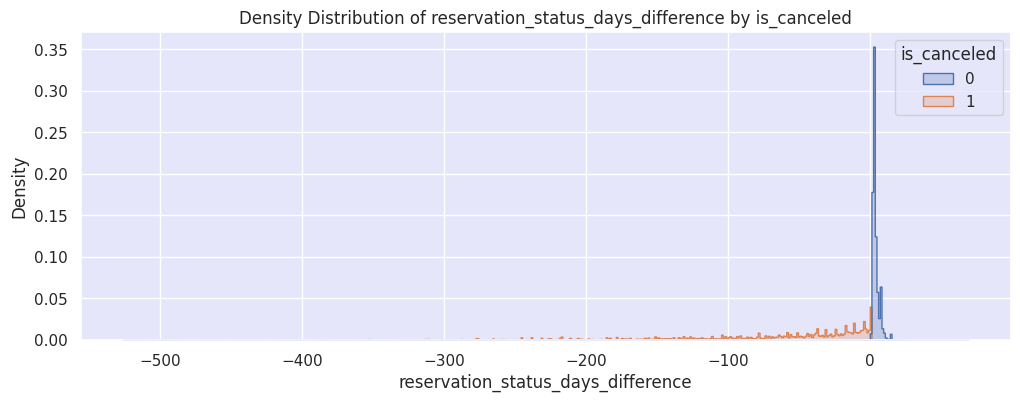

In [15]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [16]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(df[df['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(df[df['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    74460
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    42137
Name: count, dtype: int64


In [17]:
# Drop the 'reservation_status_date' and 'reservation_status_days_difference' columns
df = df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

<a id="basic"></a>
## <b><span style='color:blue'>Step 4.1.1.3 |</span><span style='color:black'> assigned_room_type</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Đặc trưng `assigned_room_type` biểu thị loại phòng được chỉ định cho khách. Thông tin này chỉ có sau khi việc đặt phòng đã được thực hiện, do đó không thể sử dụng để dự đoán việc hủy đặt phòng. Vì vậy, `assigned_room_type` được xem là một đặc trưng không phù hợp và nên được loại bỏ.

In [18]:
df = df.drop(['assigned_room_type'], axis=1)

<a id="irrelevant"></a>
## <b><span style='color:blue'>Step 4.1.2 |</span><span style='color:black'> Drop Irrelevant Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Đặc trưng arrival_date_year chỉ bao gồm một vài năm, và nếu chúng ta muốn xây dựng một mô hình có khả năng khái quát tốt cho dữ liệu trong tương lai, thì không nên đưa vào các đặc trưng có thể khiến mô hình thiên lệch về một số năm cụ thể. Do đó, hợp lý khi xem arrival_date_year là một đặc trưng không phù hợp và nên được loại bỏ.

In [19]:
df['arrival_date_year'].value_counts()


,count
arrival_date_year,
2016,56707
2017,40687
2015,21996


In [20]:
# Drop the `arrival_date_year` feature
df = df.drop(['arrival_date_year'], axis=1)

<a id="cardinality"></a>
## <b><span style='color:blue'>Step 4.1.3 |</span><span style='color:black'> Engineer and Drop High-Cardinality Features</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Dựa trên những phát hiện trước đó về các đặc trưng trong tập dữ liệu, có một số đặc trưng dạng phân loại (categorical) có số lượng danh mục rất lớn (độ phân biệt cao – high cardinality), và nhiều khả năng không cung cấp thông tin cụ thể hữu ích cho mô hình. Do đó, chúng được xem là các đặc trưng không phù hợp và nên được loại bỏ. Tuy nhiên, trước khi loại bỏ, chúng ta sẽ kiểm tra xem có thể trích xuất thông tin hữu ích nào từ các đặc trưng này hay không.


In [21]:
# Create a dataframe with the number of unique categories and missing values for each high-cardinality feature
high_cardinality_features = ['country', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card']
unique_categories = df[high_cardinality_features].nunique()
missing_values = df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})

high_cardinality_df

,Unique_Categories,Missing_Values
country,177,488
agent,333,16340
company,352,112593
name,81503,0
email,115889,0
phone-number,119390,0
credit_card,9000,0


In [22]:
# Feature Engineering for 'name' feature
# Create a new feature representing the number of bookings made by each guest (based on the name)
df['number_of_bookings'] = df.groupby('name')['name'].transform('count')

# Drop the original 'name' feature and other high-cardinality features
df = df.drop(['name', 'country', 'agent', 'company', 'email', 'phone-number', 'credit_card'], axis=1)

df[['number_of_bookings']].head()

,number_of_bookings
0,1
1,2
2,3
3,1
4,1


<a id="missing"></a>
# <b><span style='color:blue'>Step 4.2 |</span><span style='color:black'> Handle Missing Values</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Phân tích các giá trị bị thiếu trong từng cột. Nếu một cột có tỷ lệ giá trị thiếu quá cao, thì có thể tốt hơn là nên loại bỏ cột đó hoàn toàn. Đối với các cột có tỷ lệ giá trị thiếu nhỏ, chúng ta có thể xử lý bằng cách điền giá trị thiếu (impute) bằng giá trị trung bình, trung vị hoặc mode của cột, hoặc sử dụng các kỹ thuật bù dữ liệu tiên tiến hơn như phương pháp K-láng giềng gần nhất (K-nearest neighbors imputation).

In [23]:
# Calculate the missing values percentage in the original dataset
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage[missing_values_percentage > 0]

,0
children,0.00335


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
<h2 align="left"><font color=royalblue>Kết luận:</font></h2>
    
Đặc trưng children có tỷ lệ giá trị thiếu rất thấp (0.003350%) và là một đặc trưng dạng số. Dựa trên phân phối giá trị trong cột children, phần lớn các lượt đặt phòng có 0 trẻ em, đây là giá trị mode (giá trị xuất hiện nhiều nhất) rõ rệt. Do đó, việc điền các giá trị thiếu bằng 0 (mode của cột) là hợp lý. Cách tiếp cận này đơn giản và sẽ không gây ra sai lệch đáng kể trong dữ liệu.

In [24]:
df['children'].value_counts()

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


In [25]:
# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column
df['children'].isnull().sum()

np.int64(0)

<a id="noise"></a>
# <b><span style='color:blue'>Step 4.3 |</span><span style='color:black'> Handle Noisy Data</span></b>

In [26]:
# Analyze noisy data
noisy_data = {
    'adr':      df[df['adr'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies':   df[df['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
<h2 align="left"><font color=royalblue>Kết luận:</font></h2>

- `adr`: Có 1 lượt đặt phòng với Giá trung bình hàng ngày (Average Daily Rate – ADR) âm, điều này không hợp lý và cho thấy có thể là lỗi dữ liệu hoặc trường hợp đặc biệt.

    
- `adults`: Có 403 lượt đặt phòng với 0 người lớn, điều này có thể là lỗi nhập liệu, trừ khi thực sự tồn tại các trường hợp chỉ có trẻ em hoặc em bé đặt phòng.

    
- `children`: Có 1 lượt đặt phòng với 10 trẻ em, đây là con số bất thường đối với một lượt đặt phòng đơn lẻ và có thể là một ngoại lệ (outlier) hoặc lỗi nhập liệu.

    
- `babies`: Có 1 lượt đặt phòng với 10 em bé, điều này cũng bất thường và có thể là ngoại lệ hoặc lỗi nhập liệu.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
<h3 align="left"><font color=royalblue>Cách tiếp cận để giải quyết dữ liệu nhiễu:</font></h3>

Đối với từng đặc trưng, cách xử lý phù hợp nhất sẽ là:

- `adr`: Khả năng một lượt đặt phòng không có người lớn là rất thấp, nên 403 dòng dữ liệu này có vẻ là lỗi. Vì đây chỉ chiếm một tỷ lệ nhỏ trong toàn bộ tập dữ liệu, nên việc loại bỏ các dòng này là hợp lý.
    
- `adults`: Không có khả năng đặt phòng với 0 người lớn, vì vậy 403 hàng này có vẻ là lỗi. Vì đây là một tỷ lệ nhỏ trong tập dữ liệu, nên việc xóa các hàng này là hợp lý.

    
- `children`: Vì chỉ có một lượt đặt phòng có 10 trẻ em, đây có thể được xem là một ngoại lệ (outlier) và có thể loại bỏ khỏi tập dữ liệu.

    
- `babies`: Tương tự như cột children, chỉ có một lượt đặt phòng có 10 em bé, nên có thể xem là ngoại lệ và cũng nên loại bỏ khỏi tập dữ liệu.

In [27]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0, 'adr'] = df['adr'].median()

# Remove rows with 0 adults
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

<a id="encode"></a>
# <b><span style='color:blue'>Step 4.4 |</span><span style='color:black'> Encode Categorical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
Sau khi phân tích tập dữ liệu, chúng ta có thể phân loại các đặc trưng thành ba nhóm:

1. __No Encoding Needed__: Đây là những đặc trưng đã ở dạng số và có thể đưa trực tiếp vào mô hình mà không cần xử lý thêm.

    
2. __One-Hot Encoding__: Áp dụng cho các biến phân loại dạng danh định (nominal), tức là các biến phân loại không có thứ tự nội tại. Phương pháp này sẽ chuyển mỗi giá trị duy nhất trong đặc trưng thành một cột riêng biệt, với giá trị 1 hoặc 0 thể hiện sự có mặt của giá trị đó.

    
3. __Label Encoding__: Áp dụng cho các biến phân loại dạng thứ bậc (ordinal), tức là các biến phân loại có thứ tự ý nghĩa. Phương pháp này sẽ gán một số nguyên duy nhất cho mỗi danh mục, đồng thời giữ nguyên thứ tự giữa các giá trị.


In [28]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=royalblue>No Encoding Needed:</font></h3>

- `is_canceled`:
- `lead_time`:
- `arrival_date_week_number`:
- `arrival_date_day_of_month`:
- `stays_in_weekend_nights`:
- `stays_in_week_nights`:
- `adults`:
- `children`:
- `babies`:
- `is_repeated_guest`:
- `previous_cancellations`:
- `previous_bookings_not_canceled`:
- `booking_changes`:
- `days_in_waiting_list`:
- `adr`:
- `required_car_parking_spaces`:
- `total_of_special_requests`:
- `number_of_bookings`:

<h3 align="left"><font color=royalblue>One-Hot Encoding:</font></h3>

- `hotel`:
- `meal`:
- `market_segment`:
- `distribution_channel`:
- `reserved_room_type`:
- `deposit_type`:
- `customer_type`:

<h3 align="left"><font color=royalblue>Label Encoding:</font></h3>    



- `arrival_date_month`:


In [29]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_booking

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118985.0,0.370753,0.483008,0.0,0.0,0.0,1.0,1.0
lead_time,118985.0,104.071513,106.891402,0.0,18.0,69.0,160.0,737.0
arrival_date_month,118985.0,6.552364,3.089340,1.0,4.0,7.0,9.0,12.0
arrival_date_week_number,118985.0,27.164332,13.598742,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118985.0,15.796832,8.781246,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118985.0,0.926932,0.995235,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,118985.0,2.498987,1.897654,0.0,1.0,2.0,3.0,50.0
adults,118985.0,1.862689,0.570064,1.0,2.0,2.0,2.0,55.0
children,118985.0,0.100349,0.389163,0.0,0.0,0.0,0.0,3.0
babies,118985.0,0.007867,0.093070,0.0,0.0,0.0,0.0,9.0


In [32]:
df.dtypes

,0
is_canceled,int64
lead_time,int64
arrival_date_month,int64
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
babies,int64


<a id="imbalance"></a>
# <b><span style='color:blue'>Step 4.5 |</span><span style='color:black'> Check Imbalanced Data</span></b>

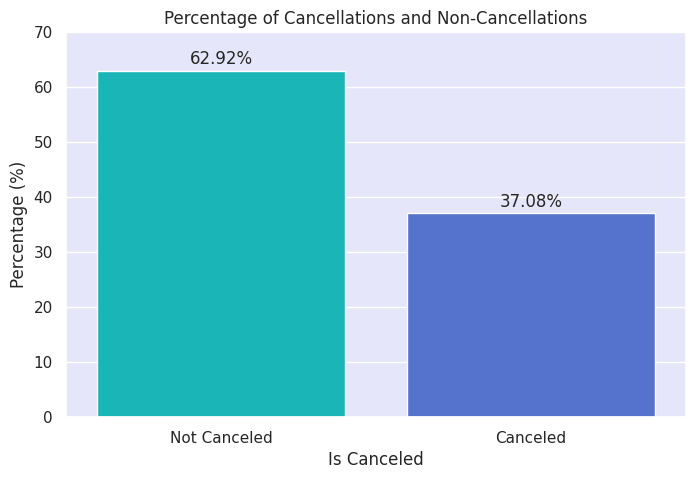

In [ ]:
# Calculating the percentage of each class
percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=royalblue>Kết luận:</font></h3>
    
Biểu đồ cột cho thấy tỷ lệ hủy và không hủy đặt phòng trong tập dữ liệu. Khoảng 37,08% các đặt phòng đã bị hủy và 62,92% không bị hủy. Điều này cho thấy biến mục tiêu có sự mất cân bằng nhất định, nhưng không phải là mất cân bằng nghiêm trọng. Thông thường, một tập dữ liệu được coi là mất cân bằng nghiêm trọng nếu một lớp chiếm hơn 80–90% dữ liệu. Trong trường hợp này, lớp thiểu số (đặt phòng bị hủy) vẫn được đại diện khá tốt, vì vậy có thể không cần áp dụng các kỹ thuật lấy mẫu lại (ví dụ: oversampling, undersampling) để cân bằng các lớp. Tuy nhiên, luôn nên thử các phương pháp khác nhau và đánh giá hiệu suất của mô hình để quyết định phương án tốt nhất.

<a id="split"></a>
# <b><span style='color:blue'>Step 4.6 |</span><span style='color:black'> Split the Dataset</span></b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_booking

In [ ]:
# Define the features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=royalblue>Note:</font></h3>
    
Trong phép chia ở trên, đã sử dụng Stratification (phân tầng), đảm bảo rằng phân bố của biến mục tiêu (is_canceled) là giống nhau trong cả tập huấn luyện và tập kiểm tra.

<a id="dt"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Decision Tree Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="dt_base"></a>
# <b><span style='color:darkturquoise'>Step 5.1 |</span><span style='color:royalblue'>  DT Base Model Definition</span></b>

In [ ]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

<a id="dt_hp"></a>
# <b><span style='color:darkturquoise'>Step 5.2 |</span><span style='color:royalblue'>  DT Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Trong bài toán đặt phòng khách sạn này, biến mục tiêu là is_canceled, cho biết liệu một đặt phòng có bị hủy (1) hay không (0). Cả hai loại lỗi __false positives__ (dự đoán bị hủy nhưng thực tế không bị hủy) và __false negatives__ (dự đoán không bị hủy nhưng thực tế lại bị hủy) — đều có thể gây thiệt hại cho khách sạn.

Tuy nhiên, __false negatives__ có thể gây tổn thất nhiều hơn vì khách sạn có thể mất khách hàng tiềm năng do đặt phòng vượt quá giới hạn, dựa trên kỳ vọng rằng một số khách sẽ hủy nhưng thực tế thì không. Do đó, việc giảm thiểu số lượng __false negatives__ là rất quan trọng, tức là cần tối đa hóa recall cho lớp ‘bị hủy’ (1).

Precision cũng quan trọng vì nó giúp giảm số lượng __false positives__, nghĩa là giảm các trường hợp mô hình dự đoán sẽ hủy nhưng khách thực sự đến. Điều này có thể dẫn đến tình trạng đặt phòng vượt mức và gây khó chịu cho khách hàng.

Vì vậy, F1-score, tức là trung bình điều hòa giữa precision và recall, sẽ là thước đo phù hợp để đánh giá mô hình vì nó cân bằng cả hai yếu tố precision và recall. Cụ thể, F1-score cho lớp ‘bị hủy’ (1) là chỉ số quan trọng nhất để đánh giá các mô hình trong dự án này.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">


Tạo một hàm để xác định tập hợp siêu tham số tối ưu nhằm tối đa hóa F1-score cho lớp 1 (các đơn đặt phòng bị hủy). Phương pháp này cung cấp một khung làm việc có thể tái sử dụng cho việc điều chỉnh siêu tham số cho các mô hình khác:

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Thiết lập một lưới các siêu tham số và sử dụng hàm __tune_clf_hyperparameters__ để xác định siêu tham số phù hợp nhất cho mô hình CDecision Tree - DT:


In [ ]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [15],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'class_weight': [{0: 1, 1: 2}]
}

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=royalblue> Note:</font></h3>


Vì dữ liệu hơi mất cân bằng và chúng ta muốn tối ưu cho lớp 1, nên chúng ta đã đưa tham số class_weight vào trong lưới siêu tham số. Trong lưới trên, trọng số cho lớp 0 luôn là 1, trong khi trọng số cho lớp 1 thay đổi từ 1 đến 3. Điều này sẽ giúp mô hình tập trung hơn vào lớp 1.

In [ ]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


<a id="dt_evaluation"></a>
# <b><span style='color:darkturquoise'>Step 5.3 |</span><span style='color:royalblue'>  DT Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Để đơn giản hóa việc đánh giá các mô hình khác nhau, chúng ta sẽ định nghĩa một tập hợp các hàm tính toán các chỉ số hiệu suất chính. Cách tiếp cận này sẽ đảm bảo tính nhất quán trong việc đánh giá từng mô hình và giúp dễ dàng so sánh giữa chúng.

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     59897
           1       0.74      0.85      0.79     35291

    accuracy                           0.83     95188
   macro avg       0.82      0.84      0.83     95188
weighted avg       0.84      0.83      0.84     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14974
           1       0.70      0.81      0.75      8823

    accuracy                           0.80     23797
   macro avg       0.79      0.80      0.79     23797
weighted avg       0.81      0.80      0.81     23797



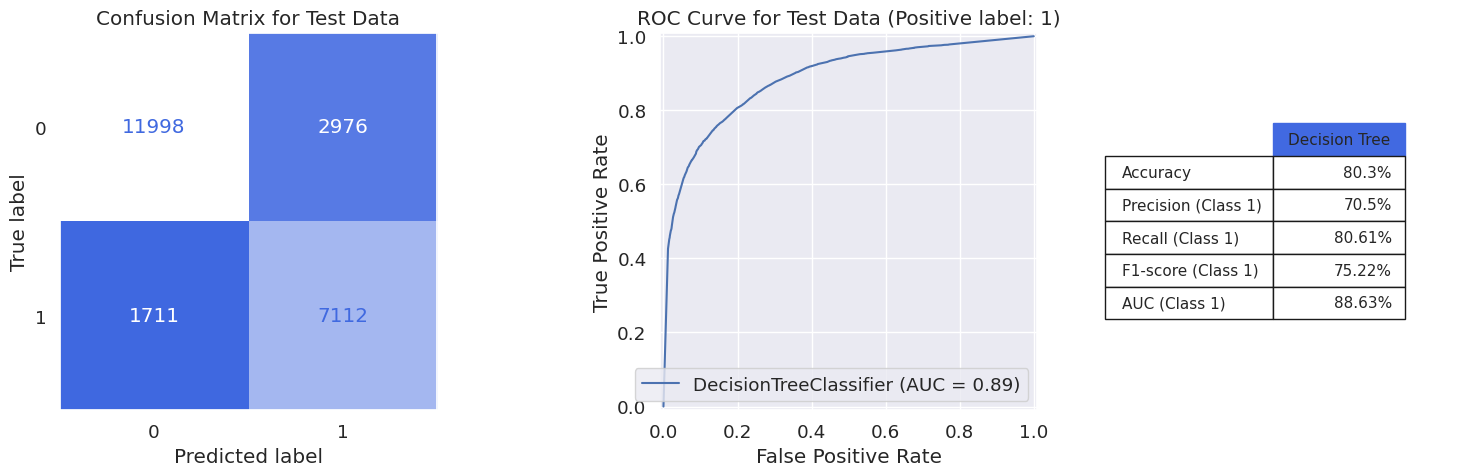

In [ ]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

In [ ]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,80.3%
Precision (Class 1),70.5%
Recall (Class 1),80.61%
F1-score (Class 1),75.22%
AUC (Class 1),88.63%


<a id="rf"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Random Forest Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="rf_base"></a>
# <b><span style='color:darkturquoise'>Step 6.1 |</span><span style='color:royalblue'>  RF Base Model Definition</span></b>

In [ ]:
# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

<a id="rf_hp"></a>
# <b><span style='color:darkturquoise'>Step 6.2 |</span><span style='color:royalblue'>  RF Hyperparameter Tuning</span></b>

In [ ]:
param_grid_rf = {
    'n_estimators': [150],
    'criterion': ['entropy'],
    'max_depth': [18],
    'min_samples_split': [4],
    'min_samples_leaf': [1],
    'class_weight': [{0: 1, 1: 2}]
}

In [ ]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


<a id="rf_evaluation"></a>
# <b><span style='color:darkturquoise'>Step 6.3 |</span><span style='color:royalblue'> RF Model Evaluation</span></b>


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     59897
           1       0.80      0.85      0.83     35291

    accuracy                           0.87     95188
   macro avg       0.86      0.86      0.86     95188
weighted avg       0.87      0.87      0.87     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     14974
           1       0.77      0.79      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



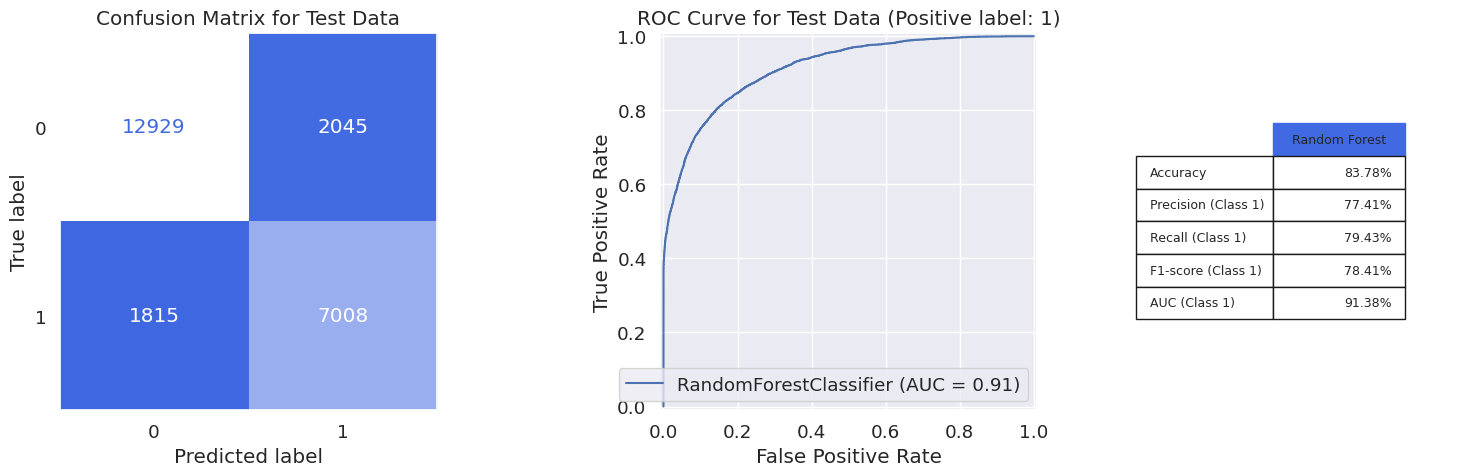

In [ ]:
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

In [ ]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,83.78%
Precision (Class 1),77.41%
Recall (Class 1),79.43%
F1-score (Class 1),78.41%
AUC (Class 1),91.38%


<a id="xgb"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | XGBoost Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

XGBoost (viết tắt của eXtreme Gradient Boosting) là một phiên bản hiệu quả và có khả năng mở rộng cao của thuật toán gradient boosting. Đây là một thuật toán học máy theo kiểu tổ hợp (ensemble) dựa trên cây quyết định và sử dụng khung gradient boosting để huấn luyện các mô hình liên tiếp nhau.

XGBoost đặc biệt phổ biến và hiệu quả trong các bài toán phân loại (classification) và hồi quy (regression), và đã được biết đến với hiệu suất và tốc độ vượt trội so với các phiên bản gradient boosting khác. XGBoost được thiết kế để đảm bảo hiệu quả xử lý cao, tính linh hoạt, và có thể triển khai dễ dàng trên nhiều nền tảng khác nhau.

<a id="xgb_base"></a>
# <b><span style='color:darkturquoise'>Step 7.1 |</span><span style='color:royalblue'>  XGBoost Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Trước tiên, chúng ta sẽ định nghĩa mô hình XGBoost cơ bản. Trong quá trình khởi tạo, ta thiết lập các tham số như sau:

- use_label_encoder=False: để tránh cảnh báo không dùng được do cách mã hóa nhãn cũ đã bị loại bỏ trong các phiên bản mới của XGBoost.

- eval_metric='logloss': chọn logarithmic loss làm hàm đánh giá, vì đây là một metric phù hợp cho bài toán phân loại nhị phân và xử lý tốt trường hợp có mất cân bằng nhẹ giữa các lớp.

In [ ]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

<a id="xgb_hp"></a>
# <b><span style='color:darkturquoise'>Step 7.2 |</span><span style='color:royalblue'>  XGBoost Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

XGBoost có nhiều siêu tham số cần được tinh chỉnh để cải thiện hiệu suất của mô hình. Một số siêu tham số quan trọng bao gồm:

- __`n_estimators`__: Số vòng boosting hoặc số cây được xây dựng. Thông thường được đặt ở giá trị lớn, nhưng XGBoost có tính năng dừng sớm để ngừng quá trình huấn luyện khi không còn cải thiện nữa.
    
- __`learning_rate`__: Hệ số thu nhỏ bước cập nhật nhằm tránh hiện tượng overfitting. Giá trị nằm trong khoảng từ 0 đến 1.

    
- __`max_depth`__: Độ sâu tối đa của một cây, có thể nằm trong khoảng từ 1 đến vô hạn.

    
- __`subsample`__: Tỷ lệ mẫu dữ liệu được chọn ngẫu nhiên cho mỗi cây. Giá trị nằm trong khoảng từ 0 đến 1.

    
- __`colsample_bytree`__: Tỷ lệ đặc trưng được chọn ngẫu nhiên cho mỗi cây. Giá trị nằm trong khoảng từ 0 đến 1.

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

Tinh chỉnh các siêu tham số này bằng cách sử dụng hàm __tune_clf_hyperparameters__, hàm này thực hiện tìm kiếm theo lưới (grid search) trên các giá trị siêu tham số được chỉ định và trả về mô hình tốt nhất.

Ngoài ra, XGBoost còn có một hàm tích hợp là xgb.cv có thể được sử dụng để tìm số vòng boosting tối ưu (hay n_estimators). Hàm này huấn luyện mô hình nhiều lần trên các tập dữ liệu con khác nhau và trả về số vòng boosting tối ưu tại thời điểm sai số nhỏ nhất. Tuy nhiên, vì đã đưa n_estimators vào quá trình grid search, nên trong trường hợp này không cần sử dụng hàm xgb.cv.

In [ ]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [350],
    'learning_rate': [0.1],
    'max_depth': [8],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [ ]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'scale_pos_weight': np.float64(1.697231588790343), 'subsample': 0.8}


In [ ]:
import pickle

# Lưu mô hình
with open("model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)


In [ ]:
# Lưu danh sách đặc trưng
features = X_train.columns.tolist()
with open("features.pkl", "wb") as f:
    pickle.dump(features, f)


<a id="xgb_evaluation"></a>
# <b><span style='color:darkturquoise'>Step 7.3 |</span><span style='color:royalblue'> XGBoost Model Evaluation</span></b>


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     59897
           1       0.86      0.89      0.87     35291

    accuracy                           0.90     95188
   macro avg       0.90      0.90      0.90     95188
weighted avg       0.90      0.90      0.90     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     14974
           1       0.79      0.80      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.84      0.84      0.84     23797
weighted avg       0.85      0.85      0.85     23797



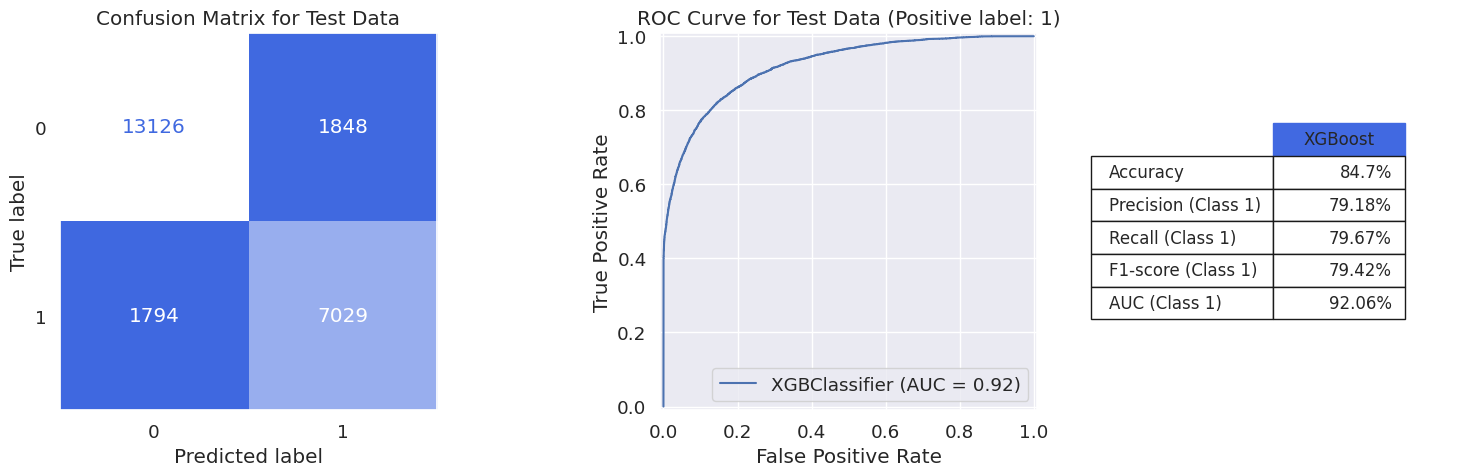

In [ ]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=royalblue>Kết luận:</font></h3>

Hiệu suất của mô hình XGBoost (XGB) trên tập dữ liệu kiểm tra như sau:

- Accuracy là 85.04%, nghĩa là mô hình dự đoán đúng việc một đơn đặt phòng sẽ bị hủy hay không khoảng 85%.
  
- Precision đối với lớp 1 (các đơn đặt phòng bị hủy) là 79.76%, nghĩa là khoảng 80% các đơn đặt phòng mà mô hình dự đoán là bị hủy thực sự đã bị hủy.

- Recall đối với lớp 1 là 79.94%, nghĩa là mô hình đã xác định đúng khoảng 80% các trường hợp bị hủy thực tế.

- F1-score cho lớp 1 là 79.85%, là trung bình điều hòa giữa Precision và Recall.

- AUC (Diện tích dưới đường cong ROC) cho lớp 1 là 92.17%, cho thấy mô hình có khả năng phân biệt rất tốt giữa hai lớp.

Mô hình không bị overfitting, vì các giá trị chỉ số trên tập kiểm tra và tập huấn luyện khá gần nhau, cho thấy mô hình tổng quát hóa tốt với dữ liệu chưa từng thấy.

So với mô hình Rừng ngẫu nhiên (Random Forest - RF), mô hình XGBoost (XGB) thể hiện sự cải thiện nhẹ ở tất cả các chỉ số hiệu suất. Mặc dù sự cải thiện không lớn, nhưng XGBoost vẫn cân bằng tốt hơn giữa Precision và Recall, dẫn đến F1-score cao hơn. Điều này cho thấy XGBoost là mô hình tốt hơn trong việc dự đoán các trường hợp hủy đặt phòng.

Tổng thể, mô hình này hoạt động tốt trên dữ liệu kiểm tra và dường như là một mô hình phù hợp để dự đoán các trường hợp hủy đặt phòng.

In [ ]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'XGBoost')
xgb_result

,XGBoost
Accuracy,84.7%
Precision (Class 1),79.18%
Recall (Class 1),79.67%
F1-score (Class 1),79.42%
AUC (Class 1),92.06%


<a id="xgb_imp"></a>
# <b><span style='color:blue'>Step 7.4 |</span><span style='color:black'>  XGBoost Feature Importance </span></b>


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

XGBoost, là một mô hình dựa trên cây quyết định, có khả năng tính toán tầm quan trọng của các đặc trưng một cách tự nhiên. Tầm quan trọng của đặc trưng cung cấp cho bạn một điểm số cho mỗi đặc trưng trong dữ liệu của bạn — điểm số càng cao thì đặc trưng đó càng quan trọng hoặc liên quan nhiều hơn đến biến đầu ra. Điều này có thể hỗ trợ trong việc lựa chọn đặc trưng và tối ưu hóa mô hình.

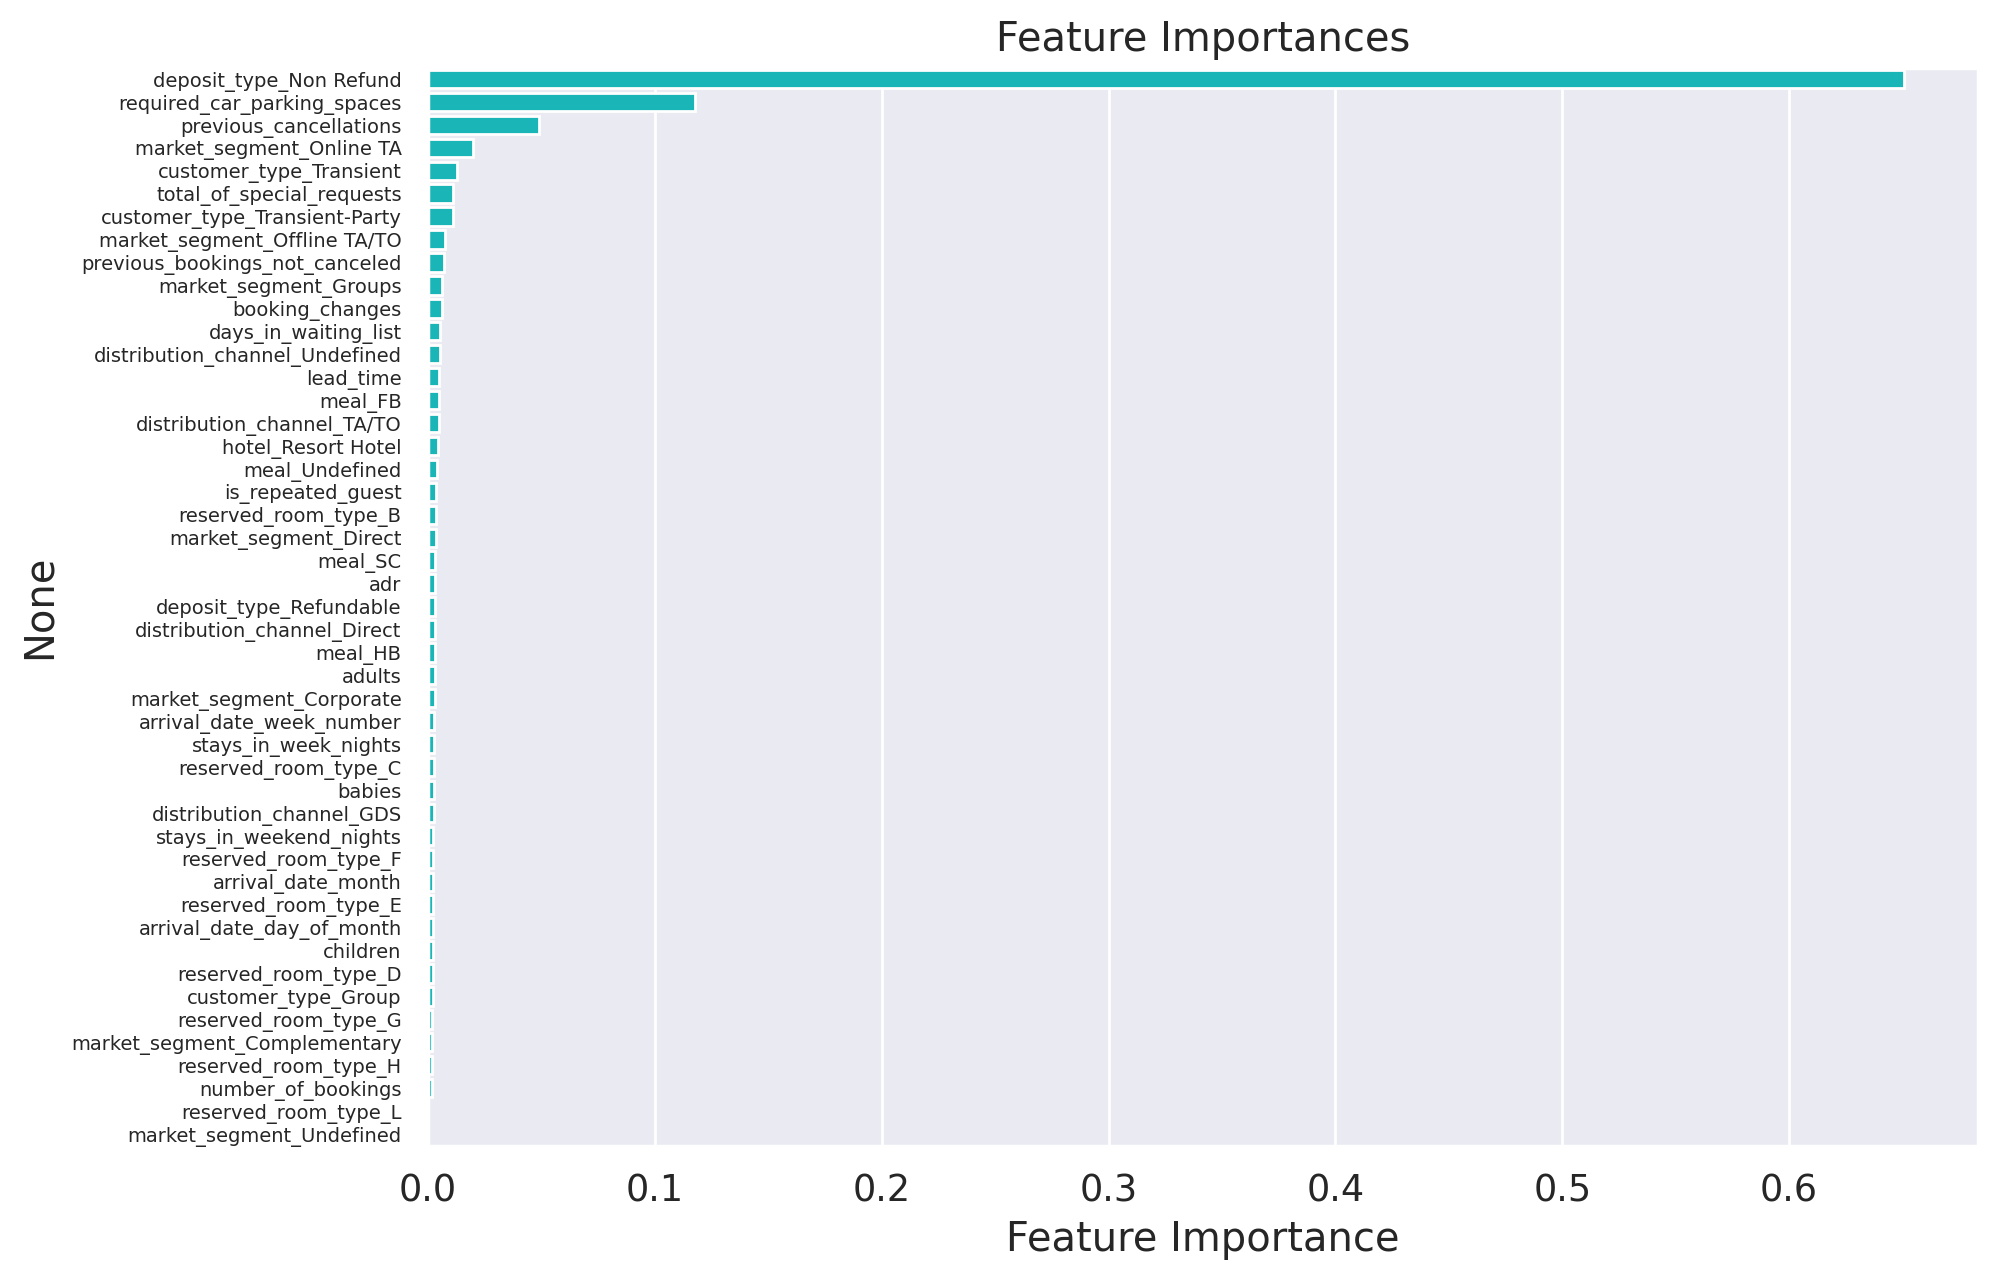

In [ ]:
# Compute feature importances
feature_importances = best_xgb.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">

<h3 align="left"><font color=black>Kết luận:</font></h3>

Mô hình __XGBoost__ đã xác định rằng các đặc trưng liên quan đến __deposit type__, __previous cancellations__, __car parking requirements__, __market segment__, và __customer type__ là những đặc trưng quan trọng nhất trong việc dự đoán khả năng hủy đặt phòng. Điều này cho thấy rằng các yếu tố về tài chính, hậu cần, kênh đặt phòng và phân loại khách hàng đóng vai trò đặc biệt quan trọng trong việc xác định một đặt phòng có bị hủy hay không.

<a id="conclusion"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | TabNet</p>

⬆️ [Tabel of Contents](#tabnet_tabel)

In [ ]:
pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
pip install pytorch-tabnet --upgrade


In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch


In [ ]:
X_train_np = X_train.values.astype(np.float32)
y_train_np = y_train.values.astype(np.int64).ravel()
X_test_np = X_test.values.astype(np.float32)
y_test_np = y_test.values.astype(np.int64).ravel()


In [ ]:
print(type(X_train_np), X_train_np.dtype)
print(type(y_train_np), y_train_np.dtype)
print(X_train_np.shape, y_train_np.shape)


<class 'numpy.ndarray'> float32
<class 'numpy.ndarray'> int64
(95188, 47) (95188,)


In [ ]:
eval_set = [(X_test_np.astype(np.float32), y_test_np.astype(np.int64))]


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

tabnet_model = TabNetClassifier(seed=42)

tabnet_model.fit(
    X_train=X_train_np,
    y_train=y_train_np,
    eval_set=eval_set,
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=20,
    patience=5,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


epoch 0  | loss: 0.50619 | test_accuracy: 0.78913 |  0:00:06s
epoch 1  | loss: 0.43966 | test_accuracy: 0.80283 |  0:00:14s
epoch 2  | loss: 0.42552 | test_accuracy: 0.81128 |  0:00:20s
epoch 3  | loss: 0.41669 | test_accuracy: 0.8104  |  0:00:28s
epoch 4  | loss: 0.41325 | test_accuracy: 0.81166 |  0:00:35s
epoch 5  | loss: 0.40789 | test_accuracy: 0.81556 |  0:00:43s
epoch 6  | loss: 0.40383 | test_accuracy: 0.8154  |  0:00:54s
epoch 7  | loss: 0.4016  | test_accuracy: 0.8162  |  0:01:01s
epoch 8  | loss: 0.39845 | test_accuracy: 0.81451 |  0:01:08s
epoch 9  | loss: 0.39576 | test_accuracy: 0.81582 |  0:01:15s
epoch 10 | loss: 0.39616 | test_accuracy: 0.81708 |  0:01:22s
epoch 11 | loss: 0.40005 | test_accuracy: 0.81838 |  0:01:29s
epoch 12 | loss: 0.39578 | test_accuracy: 0.81191 |  0:01:36s
epoch 13 | loss: 0.39403 | test_accuracy: 0.81968 |  0:01:43s
epoch 14 | loss: 0.39327 | test_accuracy: 0.79754 |  0:01:50s
epoch 15 | loss: 0.39537 | test_accuracy: 0.81704 |  0:01:58s
epoch 16

In [ ]:
def model_evaluation_2(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    y_pred_test = clf.predict(X_test)
    y_proba_test = clf.predict_proba(X_test)[:, 1]

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    RocCurveDisplay.from_predictions(y_test, y_proba_test, ax=ax2)

    # Plot confusion matrix for test set
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     59897
           1       0.85      0.64      0.73     35291

    accuracy                           0.82     95188
   macro avg       0.83      0.78      0.80     95188
weighted avg       0.83      0.82      0.82     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     14974
           1       0.85      0.63      0.72      8823

    accuracy                           0.82     23797
   macro avg       0.83      0.78      0.80     23797
weighted avg       0.83      0.82      0.81     23797



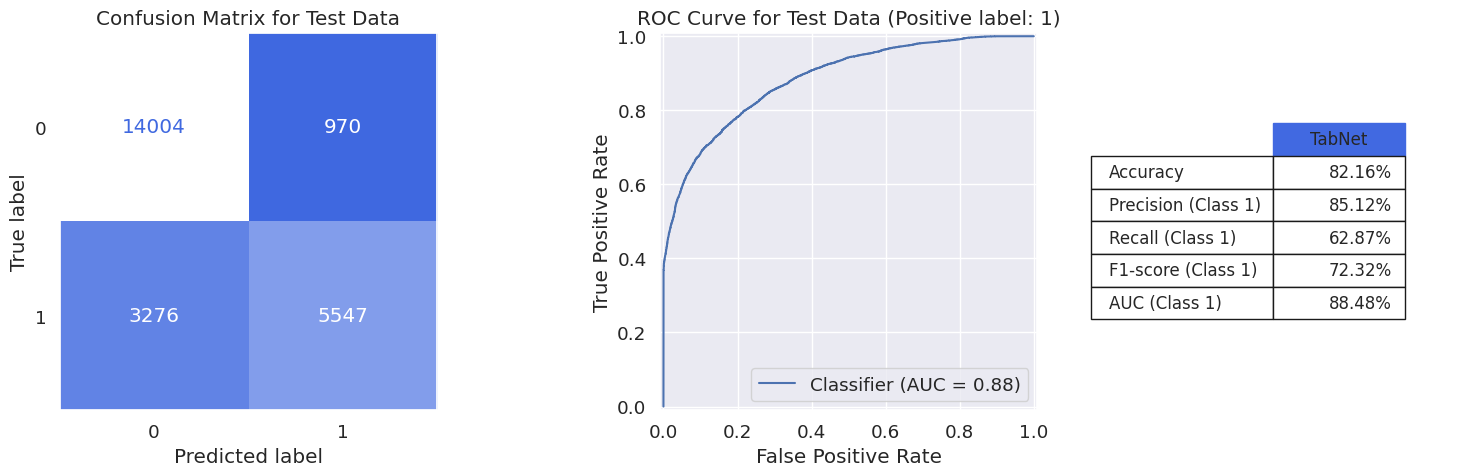

In [ ]:
model_evaluation_2(tabnet_model, X_train_np, X_test_np, y_train_np, y_test_np, "TabNet")

<a id="conclusion"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | FT-Transformer
</p>

⬆️ [Tabel of Contents](#ft_tabel)


In [ ]:
pip install rtdl torch numpy scikit-learn


In [ ]:

pip install git+https://github.com/yandex-research/rtdl.git

  Cloning https://github.com/yandex-research/rtdl.git to /tmp/pip-req-build-36essztp
  Running command git clone --filter=blob:none --quiet https://github.com/yandex-research/rtdl.git /tmp/pip-req-build-36essztp
  Resolved https://github.com/yandex-research/rtdl.git to commit bdc2fe52e0c28d0d15a3cf7d99ef94a452f23253
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Epoch 1/1 - Loss: 0.4741
Validation accuracy: 0.8127

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.95      0.86     59897
           1       0.87      0.59      0.70     35291

    accuracy                           0.81     95188
   macro avg       0.83      0.77      0.78     95188
weighted avg       0.82      0.81      0.80     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     14974
           1       0.87      0.58      0.70      8823

    accuracy                           0.81     23797
   macro avg       0.83      0.77      0.78     23797
weighted avg       0.82      0.81      0.80     23797



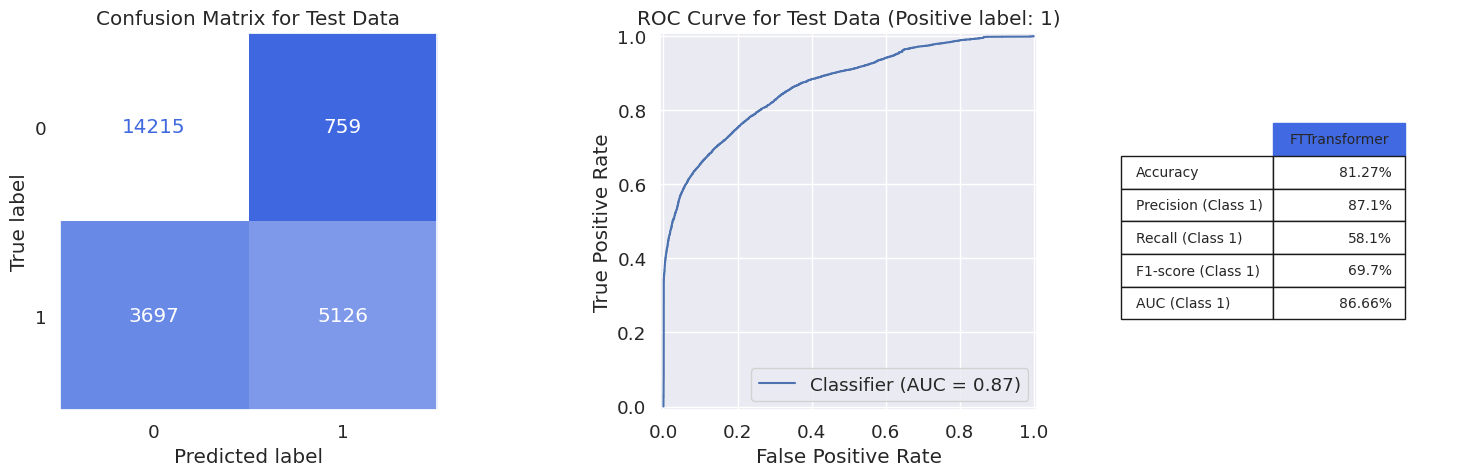

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             ConfusionMatrixDisplay, RocCurveDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import rtdl

# Tạo DataLoader
def create_dataloaders(X_train, y_train, X_test, y_test, batch_size=128):
    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                             torch.tensor(y_train, dtype=torch.long))
    test_ds = TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                            torch.tensor(y_test, dtype=torch.long))

    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
    return train_dl, test_dl

# Tạo model FTTransformer
def create_model(n_num_features, n_classes):
    model = rtdl.FTTransformer.make_default(
        n_num_features=n_num_features,
        cat_cardinalities=[],
        d_out=n_classes
    )
    return model

# Train model
def train_model(model, train_loader, val_loader=None, epochs=10, lr=1e-3, device='cpu'):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb, x_cat=None)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")

        if val_loader is not None:
            model.eval()
            val_preds = []
            val_labels = []
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb = xb.to(device)
                    out = model(xb, x_cat=None)
                    val_preds.append(out.cpu())
                    val_labels.append(yb)
            val_preds = torch.cat(val_preds)
            val_labels = torch.cat(val_labels)
            val_acc = (val_preds.argmax(dim=1) == val_labels).float().mean()
            print(f"Validation accuracy: {val_acc:.4f}")

# Đánh giá model với mini-batch
def predict_probs_and_labels(model, X, device='cpu', batch_size=256):
    model.eval()
    dataset = TensorDataset(torch.tensor(X, dtype=torch.float32))
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    all_probs = []
    all_preds = []

    with torch.no_grad():
        for (xb,) in loader:
            xb = xb.to(device)
            outputs = model(xb, x_cat=None)
            if outputs.shape[1] == 1:
                probs = torch.sigmoid(outputs).squeeze().cpu().numpy()
                preds = (probs > 0.5).astype(int)
            else:
                probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
                preds = outputs.argmax(dim=1).cpu().numpy()
            all_probs.append(probs)
            all_preds.append(preds)

    return np.concatenate(all_probs), np.concatenate(all_preds)

# Đánh giá tổng quan và trực quan hóa
def model_evaluation(model, X_train, X_test, y_train, y_test, model_name, device='cpu'):
    train_probs, train_preds = predict_probs_and_labels(model, X_train, device)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, train_preds))

    test_probs, test_preds = predict_probs_and_labels(model, X_test, device)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, test_preds))

    # Visualization
    sns.set(font_scale=1.2)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    ConfusionMatrixDisplay.from_predictions(y_test, test_preds, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    RocCurveDisplay.from_predictions(y_test, test_probs, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    result = pd.DataFrame(data=[accuracy_score(y_test, test_preds),
                                precision_score(y_test, test_preds, pos_label=1),
                                recall_score(y_test, test_preds, pos_label=1),
                                f1_score(y_test, test_preds, pos_label=1),
                                roc_auc_score(y_test, test_probs)],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns=[model_name])

    result = (result * 100).round(2).astype(str) + '%'
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')

    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')

    plt.tight_layout()
    plt.show()

# ======================
device = 'cuda' if torch.cuda.is_available() else 'cpu'
batch_size = 32

train_loader, test_loader = create_dataloaders(X_train_np, y_train_np, X_test_np, y_test_np, batch_size=batch_size)

n_num_features = X_train_np.shape[1]
n_classes = len(np.unique(y_train_np))

model = create_model(n_num_features, n_classes)

train_model(model, train_loader, val_loader=test_loader, epochs=1, lr=1e-3, device=device)

model_evaluation(model, X_train_np, X_test_np, y_train_np, y_test_np, "FTTransformer", device=device)

<a id="conclusion"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 | LightGBM</p>

⬆️ [Tabel of Contents](#LGBM_tabel)

In [ ]:
# Tạo mô hình cơ sở
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(class_weight='balanced', random_state=0)

In [ ]:
# GridSearchCV tìm siêu tham số tốt
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10]
}

In [ ]:
lgbm_best, lgbm_best_params = tune_clf_hyperparameters(lgbm, lgbm_params, X_train, y_train)
print("Best LightGBM Params:", lgbm_best_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35291, number of negative: 59897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 946
[LightGBM] [Info] Number of data points in the train set: 95188, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best LightGBM Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     59897
           1       0.80      0.80      0.80     35291

    accuracy                           0.85     95188
   macro avg       0.84      0.84      0.84     95188
weighted avg       0.85      0.85      0.85     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14974
           1       0.78      0.78      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.82      0.83     23797
weighted avg       0.84      0.84      0.84     23797



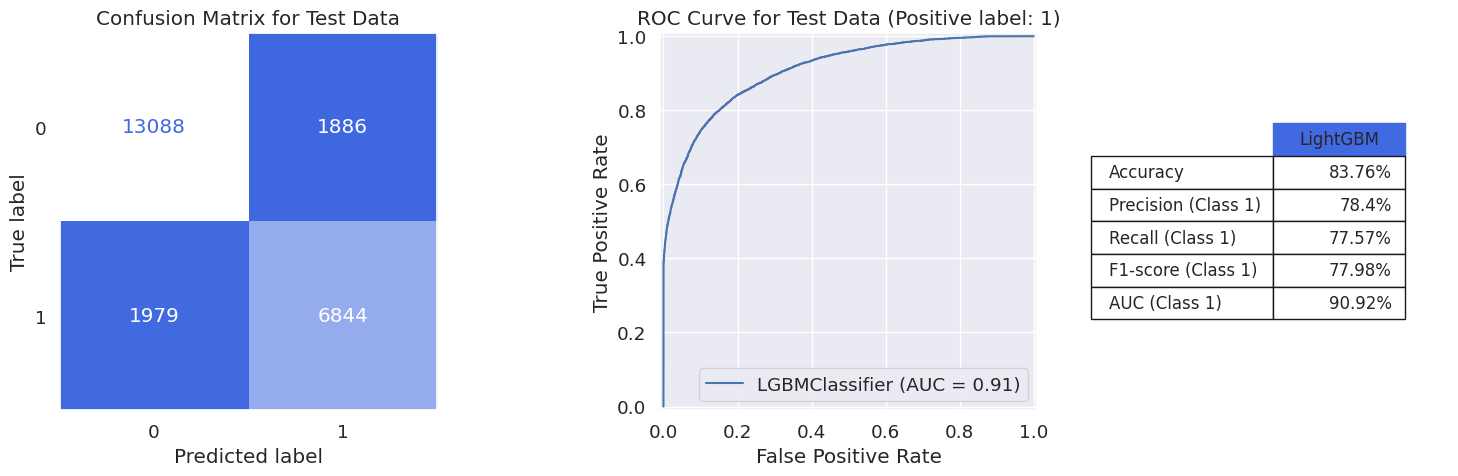

In [ ]:
# Đánh giá mô hình
model_evaluation(lgbm_best, X_train, X_test, y_train, y_test, "LightGBM")

<a id="conclusion"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Logistic Regression</p>

⬆️ [Tabel of Contents](#logistic_tabel)

Best Logistic Regression Params: {'C': 1}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     59897
           1       0.71      0.72      0.71     35291

    accuracy                           0.79     95188
   macro avg       0.77      0.77      0.77     95188
weighted avg       0.79      0.79      0.79     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     14974
           1       0.71      0.72      0.71      8823

    accuracy                           0.78     23797
   macro avg       0.77      0.77      0.77     23797
weighted avg       0.78      0.78      0.78     23797



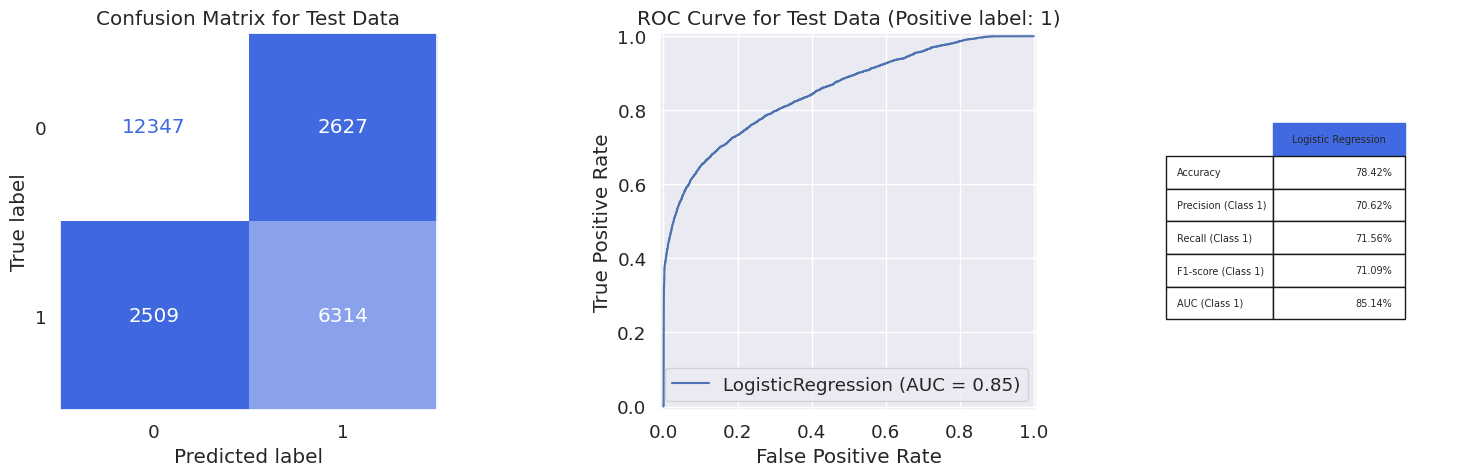

In [ ]:
# Tạo mô hình cơ sở
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=0)

# GridSearchCV tìm siêu tham số tốt
log_reg_params = {
    'C': [0.01, 0.1, 1, 10]
}

log_reg_best, log_reg_best_params = tune_clf_hyperparameters(log_reg, log_reg_params, X_train, y_train)
print("Best Logistic Regression Params:", log_reg_best_params)

# Đánh giá mô hình
model_evaluation(log_reg_best, X_train, X_test, y_train, y_test, "Logistic Regression")


<a id="conclusion"></a>
# <p style="background-color:black; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | CatBoost</p>

⬆️ [Tabel of Contents](#catboost_tabel)

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


Best CatBoost Params: {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     59897
           1       0.71      0.92      0.80     35291

    accuracy                           0.83     95188
   macro avg       0.83      0.85      0.83     95188
weighted avg       0.86      0.83      0.84     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     14974
           1       0.68      0.88      0.77      8823

    accuracy                           0.80     23797
   macro avg       0.80      0.82      0.80     23797
weighted avg       0.83      0.80      0.80     23797



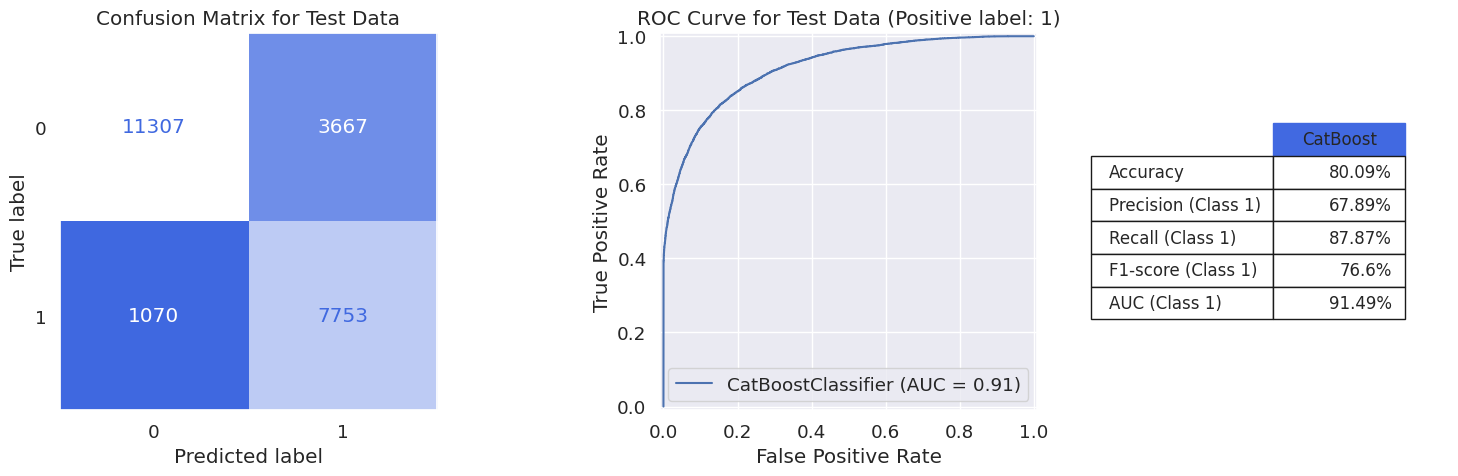

In [ ]:
# Tạo mô hình cơ sở
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=0, class_weights=[1, 3])  # xử lý mất cân bằng

# GridSearchCV tìm siêu tham số tốt
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [6, 10]
}

catboost_best, catboost_best_params = tune_clf_hyperparameters(catboost, catboost_params, X_train, y_train)
print("Best CatBoost Params:", catboost_best_params)

# Đánh giá mô hình
model_evaluation(catboost_best, X_train, X_test, y_train, y_test, "CatBoost")
